# Homework 3 
### ASTROINFORMATICS

## Problem 1

We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 


## Problem 2

Fit polynomials of up to the 5th order to the provided dataset.
Use BIC to find the best model for this dataset.

## Problem 3 

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. 
Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) 
uniform bin width histogram. 


### Some useful definitions and functions

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy import integrate
from astroML.datasets import fetch_LINEAR_geneva
from astroML.plotting import setup_text_plots
from astroML.plotting import hist
setup_text_plots(fontsize=8, usetex=True)

## Problem 1: the coin flip
We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 


/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/varun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/varun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/home/varun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/varun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Total coin tosses: 8
Number of tails  : 4
The probability that heads is prefered over tails is : 0.052890


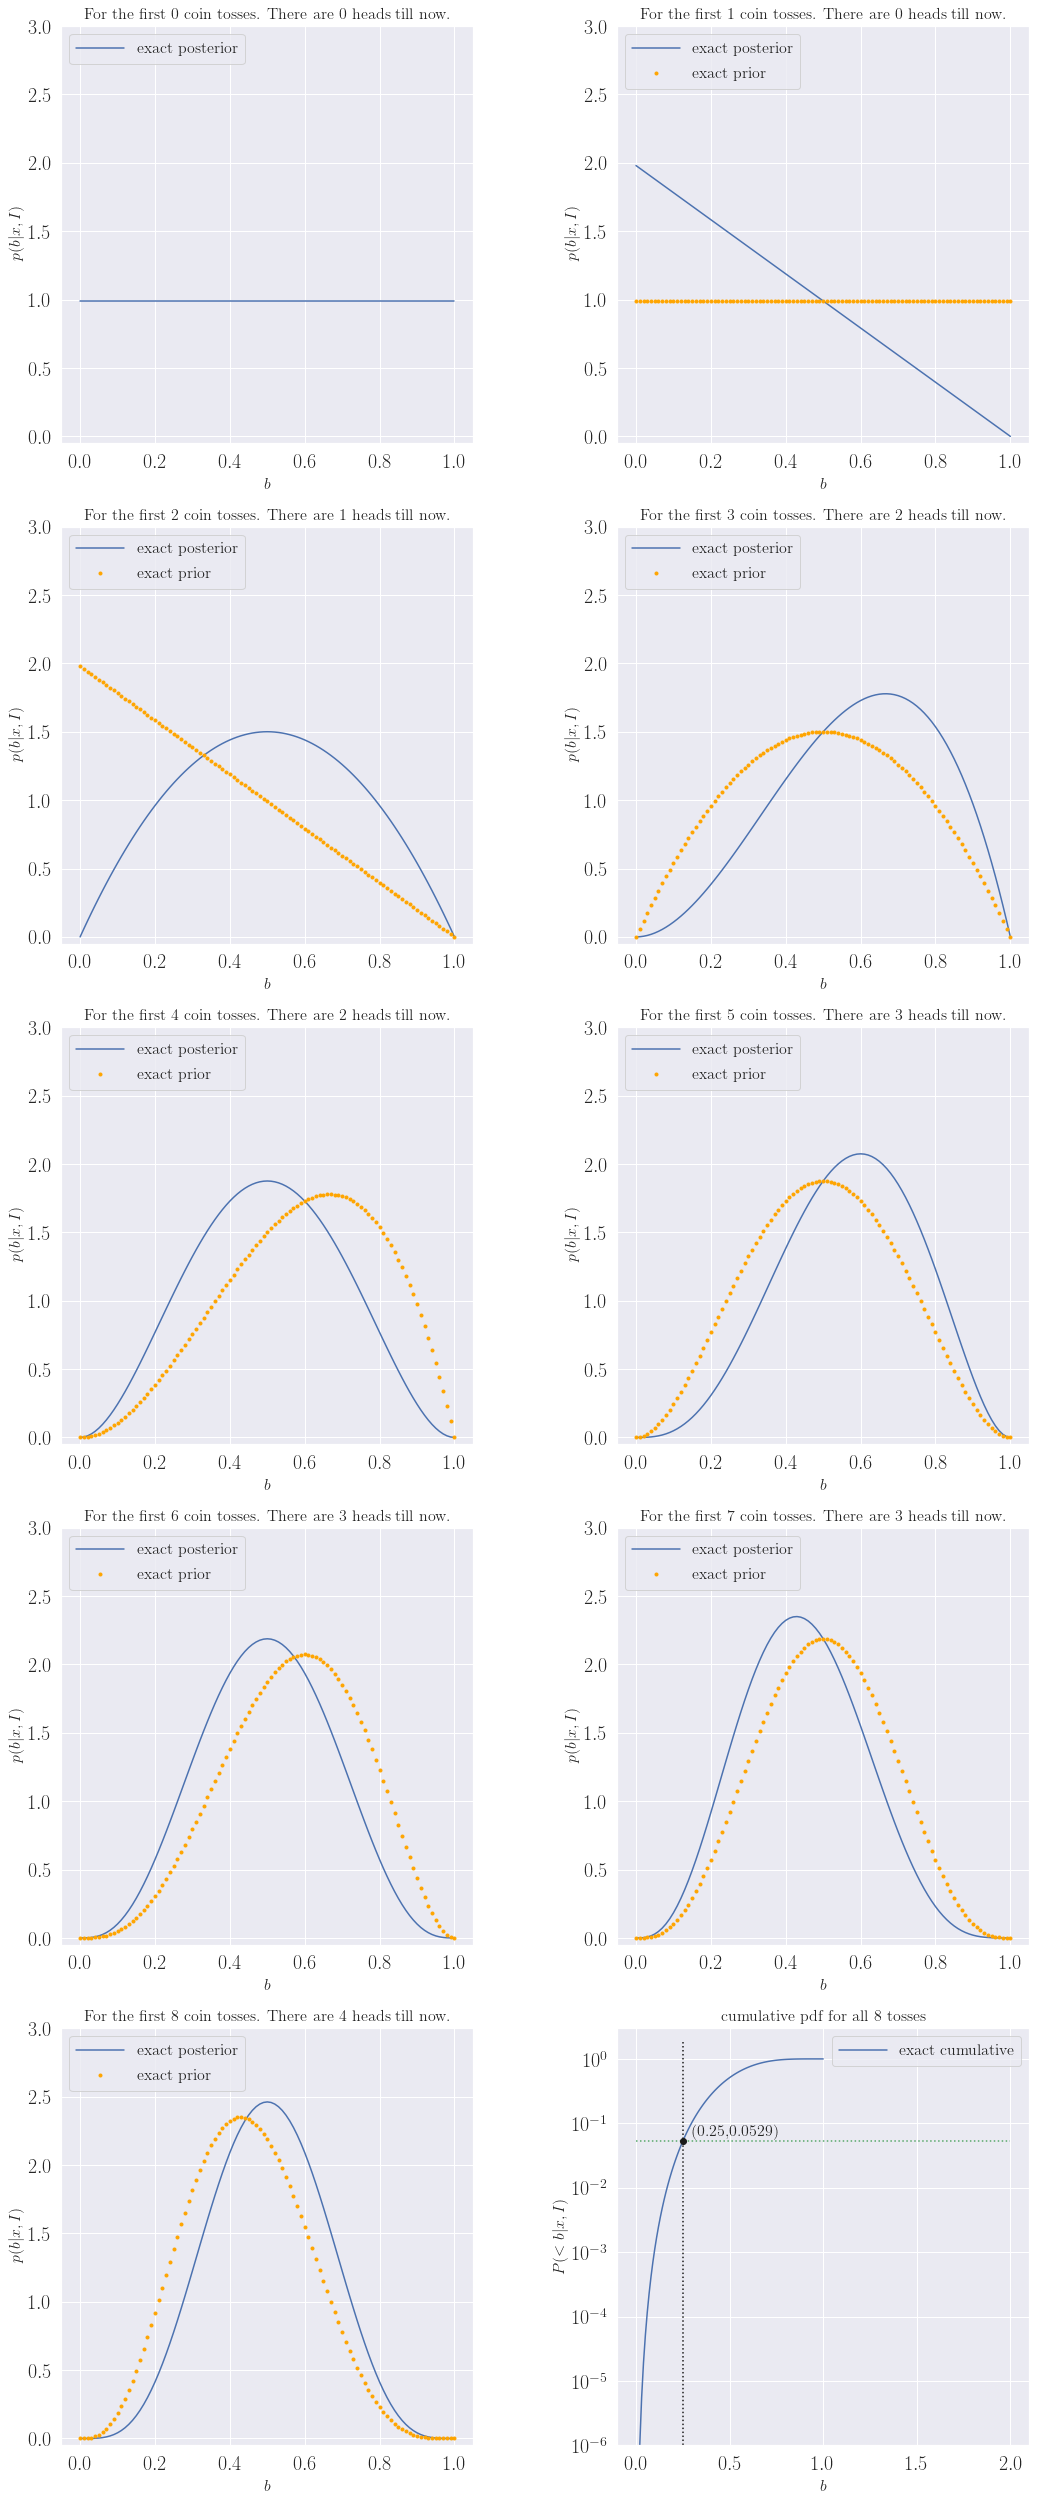

In [11]:
from scipy.stats import norm
np.random.seed(42)
# results for my coin (0:head, 1: tail - change it according to your results!!!)

flipData = [0,1,1,0,1,0,0,1] #feel free to change number of coin tosses
toss=len(flipData)
fig = plt.figure(figsize=(2*toss,6*toss))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)
b = np.linspace(0, 1, 101)
db = b[1] - b[0]

def p(n,k):
    # compute the probability p(b)
    p_b = b ** k * (1 - b) ** (n - k)
    p_b /= p_b.sum()
    p_b /= db
    # compute the gaussian approximation
    b0 = k * 1. / n
    sigb = np.sqrt(b0*(1-b0)/n)
    p_g = norm(b0, sigb).pdf(b)
    return(p_b,p_g)

def cumlp(n,k):
    cuml_p_b = p(n,k)[0].cumsum()
    cuml_p_b /= cuml_p_b[-1]
    
    cuml_p_g = p(n,k)[1].cumsum()
    cuml_p_g /= cuml_p_g[-1]
    return(cuml_p_b,cuml_p_g)
    
for i in range(0,len(flipData)+1):
    n=len(flipData[:i]) #total number of tosses
    k=np.sum(flipData[:i]) #total number of tails
    # Plot the results
    p_b,p_g=p(n,k)
    ax = fig.add_subplot(np.ceil((toss+2)/2) ,2,(i+1))
    ax.plot(b, p_b, '-b',label='exact posterior')
#     ax.plot(b, p_g, '-r',label='Gauss approx. posterior')
    ax.set_ylim(-0.05, 3)
    ax.set_xlabel('$b$',size=toss*2)
    ax.set_ylabel('$p(b|x,I)$',size=toss*2)
    plt.tick_params(labelsize=toss*2.5)
    plt.title("For the first %d coin tosses. There are %d heads till now."%(i,k),size=toss*2)
    if(i>0):
        n=len(flipData[0:(i-1)])
        k=np.sum(flipData[0:(i-1)])    
        ax.plot(b, p(n,k)[0], '.',c='orange',label='exact prior')
#         ax.plot(b, p(n,k)[1], '.r',label='Gauss approx. prior')
    plt.legend(loc=2,prop={'size': toss*2})
    plt.tick_params(labelsize=toss*2.5)


n=len(flipData) #total number of tosses
k=np.sum(flipData) #total number of tails
cuml_p_b, cuml_p_g= cumlp(n,k)

p_tails=cuml_p_b[b==0.25]    
print("Total coin tosses: %d"%n)
print("Number of tails  : %d"%k)
print("The probability that heads is prefered over tails is : %.6f"%p_tails)
ax = fig.add_subplot(np.ceil((toss+2)/2),2,toss+2, yscale='log')
ax.plot(b, cuml_p_b, '-b',label='exact cumulative')
# ax.plot(b, cuml_p_g, '-r',label='Gauss approx. posterior')
ax.plot([0.25, 0.25], [1E-6, 2], ':k')
ax.plot([1E-6, 2],[p_tails,p_tails], ':g')
ax.plot(0.25,p_tails,'ok')
plt.title('cumulative pdf for all %d tosses'%n,size=toss*2)
plt.text(0.3,p_tails+0.01,'(%.2f,%.4f)'%(0.25,p_tails),size=toss*2)
plt.legend(loc=1,prop={'size':toss*2})
plt.tick_params(labelsize=toss*2.5)

ax.set_xlabel('$b$',size=toss*2)
ax.set_ylabel('$P(<b|x,I)$',size=toss*2)
ax.set_ylim(1E-6, 3)
#plt.savefig('a.eps',format='eps',dpi=1000)
plt.show()

## Problem 2: use BIC to find the best polynomial model for a given dataset
Fit polynomials of up to the 5th order to the provided dataset. Use BIC to find the best model for this dataset.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

CHI2:
   best linear model: 349.65913513675673
   best quadratic model: 99.33135251840518
   best cubic model: 10.182096497784007
   best quartic model: 10.090493156030245
   best quintic model: 9.753601450035225
CHI2 per degree of freedom:
   best linear model: 16.650435006512225
   best quadratic model: 4.966567625920259
   best cubic model: 0.5358998156728425
   best quartic model: 0.5605829531127914
   best quintic model: 0.573741261766778
BIC:
   best linear model: 355.84122004347336
   best quadratic model: 108.60447987848013
   best cubic model: 22.546266311217273
   best quartic model: 25.545705422821825
   best quintic model: 28.299856170185123


We see that cubic model has the lowest BIC (= 22.5463), hence it is the best possible fit.


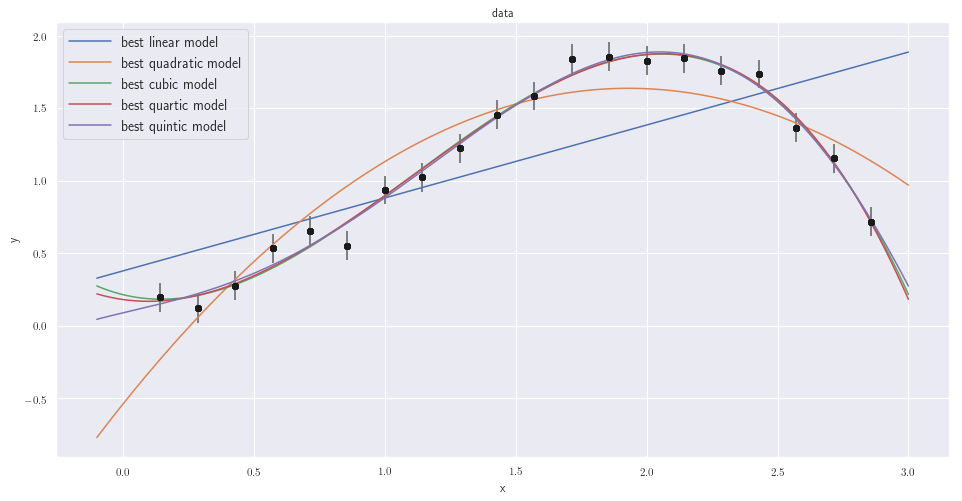

In [13]:
# generate (noisy) data
np.random.seed(0)
Ndata = 22
x = np.linspace(0, 3, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y)
num=5
chi2=np.zeros(num)
chi2dof=np.zeros(num)
bic=np.zeros(num)
model=['linear','quadratic','cubic','quartic','quintic','hexic','septic','octic']

fig, ax = plt.subplots(figsize=(16, 8))
for i in range(num):
    theta = best_theta(i+1, x, y, sigma_y)
    xfit = np.linspace(-0.1, 3.0, 1000)
    yfit = polynomial_fit(theta, xfit)
    chi2[i] = np.sum(((y-polynomial_fit(theta, x))/sigma_y)**2) 
    chi2dof[i] = chi2[i]/(Ndata -(i+1))
    bic[i]=chi2[i]+(i+2)*np.log(Ndata)
    ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
    ax.plot(xfit, polynomial_fit(theta, xfit), label='best %s model'%model[i])
    ax.legend(loc='best', fontsize=14)
    ax.set(xlabel='x', ylabel='y', title='data');
    
    
print("CHI2:")
for i in range(num): print('   best %s model:'%model[i],chi2[i])
print("CHI2 per degree of freedom:")
for i in range(num): print('   best %s model:'%model[i], chi2dof[i])    
print("BIC:")
for i in range(num): print('   best %s model:'%model[i], bic[i])

best=np.argmin(bic)
print("\n\nWe see that %s model has the lowest BIC (= %.4f), hence it is the best possible fit."%(model[best],bic[best]))

## Problem 3
Compare Bayesian Blocks Algorithm and classsical histogram
on a sample of periodic variable stars.

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) uniform bin width histogram. 

In [14]:
# fetch data
data = fetch_LINEAR_geneva()
x = data['logP']

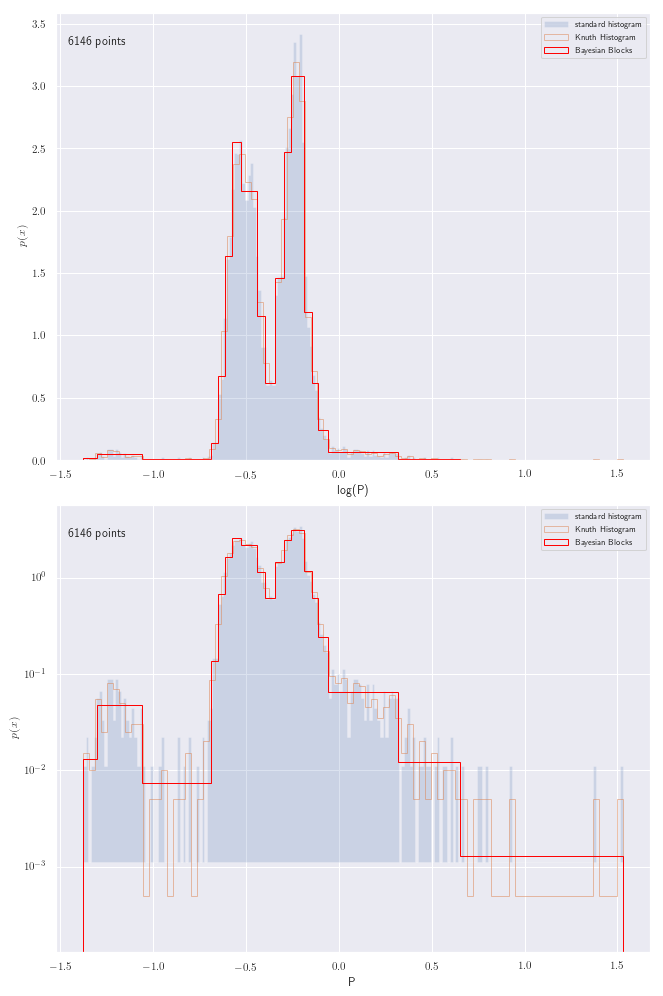

In [18]:
N_values = len(x)

# plot the results
fig = plt.figure(figsize=(10, 15))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)

# plot the results
def histo(x,log=False):
    
    hist(x, bins=200, histtype='stepfilled',
         alpha=0.2, label='standard histogram', log=log,density=True);
    hist(x, bins='knuth', ax=ax, density=True,
         histtype='step', alpha=0.5,
         label='Knuth Histogram',log=log)
    hist(x, bins='blocks', ax=ax, density=True,
         histtype='step', color='red', alpha=0.99,
         label="Bayesian Blocks",log=log)

ax = fig.add_subplot(211)
histo(x,False)
# label the plot
ax.text(0.02, 0.95, "%i points" % N_values, ha='left', va='top',
        transform=ax.transAxes)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('log(P)')
ax.legend(loc='upper right', prop=dict(size=8))

ax = fig.add_subplot(212)
histo(x,True)
# label the plot
ax.text(0.02, 0.95, "%i points" % N_values, ha='left', va='top',
        transform=ax.transAxes)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('P')
# ax.set_xlim(0,3)
ax.legend(loc='upper right', prop=dict(size=8))
plt.show()

`Question 3 Answer: In the LINEAR plot, we see that both Knuth Histogram and Bayesian Blocks are equally good representations of the data and both of them compliment each other. This gives us peaks at two periods.
Whereas, in the LOG scaled plot, the peak is not easiliy differentiated.  bayesian blocks is much better binned/resolved than Knuth' histogram`